# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
!pip install citipy

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

In [27]:


# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# List of city data
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=saldanha
Processing Record 1 of Set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=dikson
Processing Record 2 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=busselton
Processing Record 3 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=kapaa
Processing Record 4 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=hilo
Processing Record 5 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=ewa beach
Processing Record 6 of Set 1 | ewa beach
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=saleaula
Processing Record 3 of Set 2 | saleaula
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=hovd
Processing Record 4 of Set 2 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=ekhabi
Processing Record 5 of Set 2 | ekhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=iskateley
Processing Record 6 of Set 2 | iskateley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=tacoronte
Processing Record 7 of Set 2 | tacoronte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=barentsburg
Processing Record 8 of Set 2 | barentsburg
City not found. Skipping...
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=longyearbyen
Processing Record 6 of Set 3 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=camacha
Processing Record 7 of Set 3 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=lebu
Processing Record 8 of Set 3 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=marcona
Processing Record 9 of Set 3 | marcona
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=hay river
Processing Record 10 of Set 3 | hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=seoul
Processing Record 11 of Set 3 | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=karaul
Processing Record 10 of Set 4 | karaul
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=katsuura
Processing Record 11 of Set 4 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=kirovskiy
Processing Record 12 of Set 4 | kirovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=tazovskiy
Processing Record 13 of Set 4 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=sao filipe
Processing Record 14 of Set 4 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=bayir
Processing Record 15 of Set 4 | bayir
http://api.openweathermap.org/data/2.5/weather?units=Imp

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=jawhar
Processing Record 14 of Set 5 | jawhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=podor
Processing Record 15 of Set 5 | podor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=tall kayf
Processing Record 16 of Set 5 | tall kayf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=ilulissat
Processing Record 17 of Set 5 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=mount isa
Processing Record 18 of Set 5 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=tasiilaq
Processing Record 19 of Set 5 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imper

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=grand river south east
Processing Record 18 of Set 6 | grand river south east
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=solovetskiy
Processing Record 19 of Set 6 | solovetskiy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=bambanglipuro
Processing Record 20 of Set 6 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=porto torres
Processing Record 21 of Set 6 | porto torres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=kapustin yar
Processing Record 22 of Set 6 | kapustin yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=attawapiskat
Pro

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=san juan
Processing Record 22 of Set 7 | san juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=mariinsk
Processing Record 23 of Set 7 | mariinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=kuito
Processing Record 24 of Set 7 | kuito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=antofagasta
Processing Record 25 of Set 7 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=san jose
Processing Record 26 of Set 7 | san jose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=tura
Processing Record 27 of Set 7 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad232

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=tornabe
Processing Record 26 of Set 8 | tornabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=poya
Processing Record 27 of Set 8 | poya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=kahului
Processing Record 28 of Set 8 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=caravelas
Processing Record 29 of Set 8 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=gamba
Processing Record 30 of Set 8 | gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=prado
Processing Record 31 of Set 8 | prado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=nan
Processing Record 32 of Set 9 | nan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=cap malheureux
Processing Record 33 of Set 9 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=denpasar
Processing Record 34 of Set 9 | denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=emerald
Processing Record 35 of Set 9 | emerald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=visby
Processing Record 36 of Set 9 | visby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=marzuq
Processing Record 37 of Set 9 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=sivas
Processing Record 35 of Set 10 | sivas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=tambacounda
Processing Record 36 of Set 10 | tambacounda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=togur
Processing Record 37 of Set 10 | togur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=jose bonifacio
Processing Record 38 of Set 10 | jose bonifacio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=smidovich
Processing Record 39 of Set 10 | smidovich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=ixtapa
Processing Record 40 of Set 10 | ixtapa
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=palmer
Processing Record 39 of Set 11 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=vaxjo
Processing Record 40 of Set 11 | vaxjo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=hamilton
Processing Record 41 of Set 11 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=brigantine
Processing Record 42 of Set 11 | brigantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=tehachapi
Processing Record 43 of Set 11 | tehachapi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba809ad2326c8a90fdcf&q=mehamn
Processing Record 44 of Set 11 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d92779e01f1ba80

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          531
Lat           531
Lng           531
Max Temp      531
Humidity      531
Cloudiness    531
Wind Speed    531
Country       531
Date          531
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

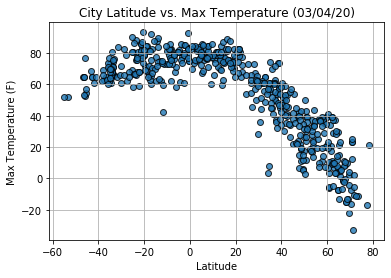

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

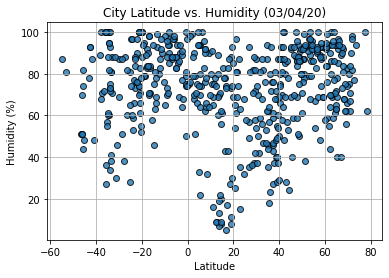

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

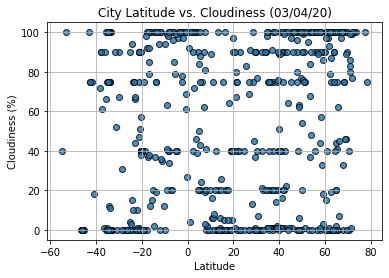

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

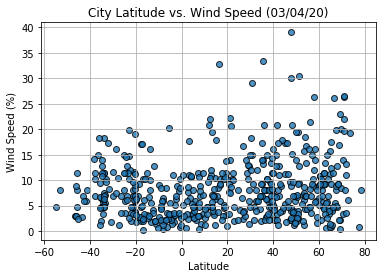

In [34]:
# Build the scatter plots for latitude vs. wind speed plot
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression